In [2]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder

#load music.csv dataset 
data=pd.read_excel('Bank_customer_churn_modelling.xlsx')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Label Encoding
le1=LabelEncoder()
le2=LabelEncoder()

# Encoding geography
le1.fit(data.Geography)
data.Geography=le1.transform(data.Geography)

# Encoding gender
le2.fit(data.Gender)
data.Gender=le2.transform(data.Gender)

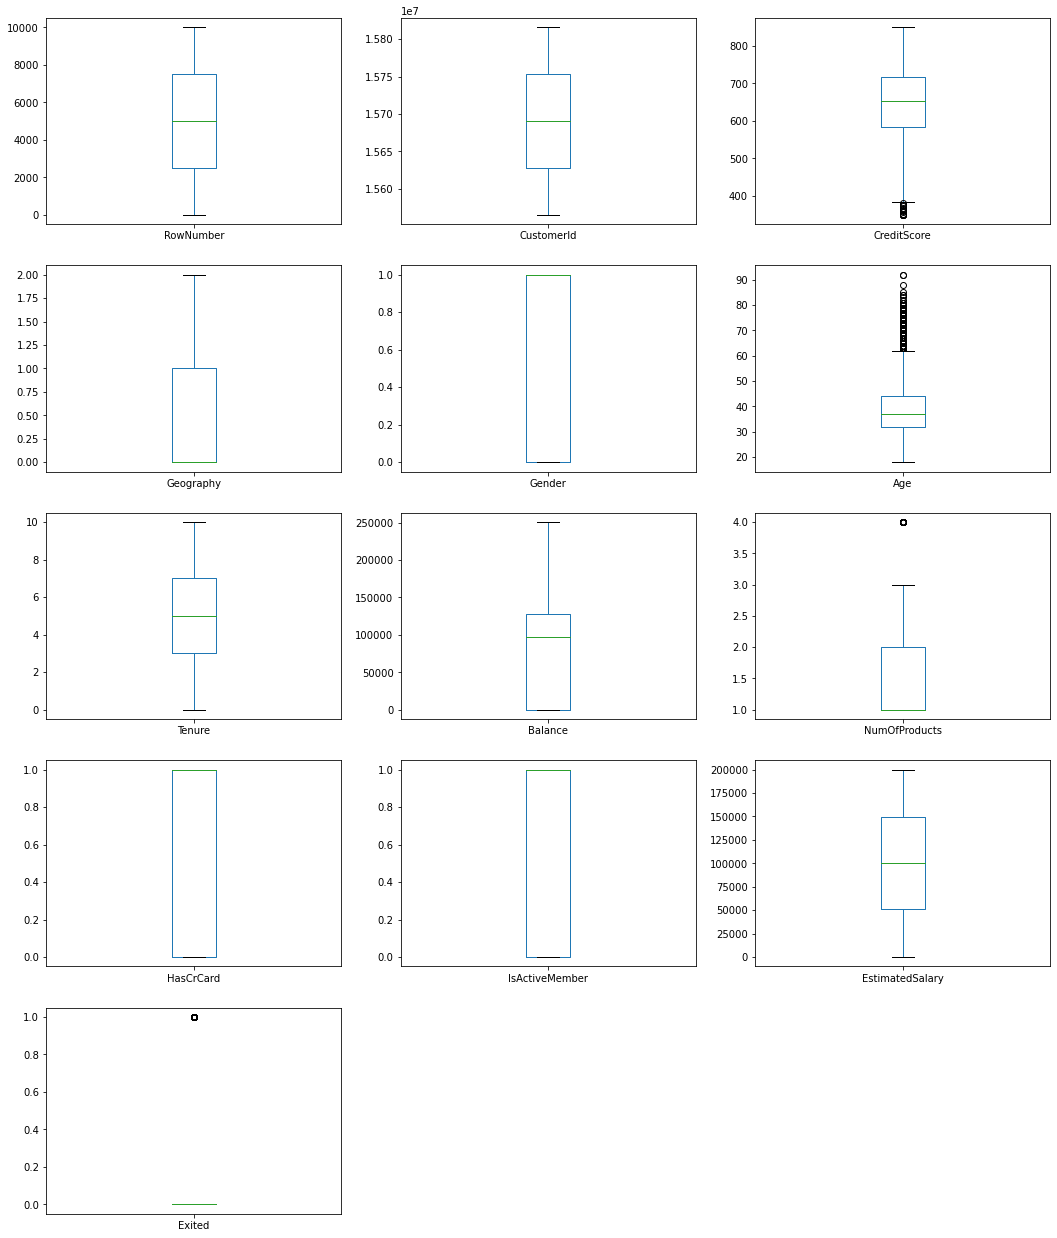

In [8]:
import matplotlib
from matplotlib import pyplot
data.plot(kind='box',subplots=True,layout=(5,3),figsize=(18,22))
pyplot.show()

In [10]:
X = data.drop(['Exited','CustomerId','Surname','RowNumber','Geography','Gender'],axis='columns')

array = X.values
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(1,10))
data_rescaled = data_scaler.fit_transform(array)
print(data_rescaled)


[[ 5.842       3.91891892  2.8        ... 10.         10.
   5.56061404]
 [ 5.644       3.7972973   1.9        ...  1.         10.
   6.06437865]
 [ 3.736       3.91891892  8.2        ... 10.          1.
   6.12688917]
 ...
 [ 7.462       3.18918919  7.3        ...  1.         10.
   2.89351083]
 [ 8.596       3.91891892  3.7        ... 10.          1.
   5.17986148]
 [ 8.956       2.21621622  4.6        ... 10.          1.
   2.71822809]]


In [ ]:
#from sklearn.preprocessing import Normalizer
Data_normalizer = Normalizer(norm='l1').fit(X)
Data_normalized = Data_normalizer.transform(X)
print(Data_normalized )
print(Data_normalized1)


In [16]:
# create input Dataset 
X= data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography','Gender'])
# create output dataset
y= data['Exited']

# Give training and testing dataset to model 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

#instantiate the DecisionTreeClassifier 
model= DecisionTreeClassifier()
# Train the model with 80% of training data 
model= model.fit(X_train,y_train)

# Test model predtiction  
predictions =model.predict(X_test)

#check the accuracy score  
score = accuracy_score(y_test,predictions)
score

1.0